\begin{equation}
{\cal H} = -J \sum_i \vec{S}_i \cdot \vec{S}_{i+1}
\end{equation}

\begin{equation}
\frac{d \langle O \rangle }{dt} =\frac{-i}{\hbar} [H,O]
\end{equation}

\begin{equation}
[H,S_j] = -J \sum_i \left( S_i \cdot S_{i+1} S_j - S_j S_i \cdot S_{i+1} \right)
\end{equation}

assume $j=i$

\begin{equation}
-\frac{[H,S_i]^x}{J} = \left( S^x_i S^x_{i+1} + S^y_{i} S^y_{i+1} +S^z_i S^z_{i+1} \right) S^x_i 
- S^x_i \left( S^x_i S^x_{i+1} + S^y_{i} S^y_{i+1} +S^z_i S^z_{i+1} \right)
\end{equation}
\begin{equation}
\left(S^x_i S^y_i -S^x_i S^y_i- i S^z_{i} \right) S^y_{i+1} 
+ \left(S^x_i S^z_i - S^x_i S^z_i+ i S^y_i \right) S^z_{i+1}
\end{equation}
\begin{equation}
= -i S^z_i S^y_{i+1} + i S^y_i S^z_{i+1} = i (S_i \times S_{i+1})^x 
\end{equation}

In [2]:
using PyPlot

In [183]:
N=10000;
dt=.01;
tn=10000;
S=zeros(Float64,3,N,tn);

waveish=2*π*collect(1:N)/N;

In [179]:
delta=.01;

# x component at first time step 
S[1,:,1]=delta*cos(10*waveish);
# y component at first time step
S[2,:,1]=delta*sin(10*waveish);
# z component at first time step
S[3,:,1]=ones(N);

for ii in 1:N
    #println(S[:,ii,1],"\t",norm(S[:,ii,1]),"\t",S[:,ii,1]/norm(S[:,ii,1]))
    S[:,ii,1]=S[:,ii,1]/norm(S[:,ii,1]) 
end

In [182]:
for ii in 2:tn
    for jj in 1:N
        nei=jj%N+1
        nei2=(jj+N-2)%N+1
        S[:,jj,ii]= S[:,jj,ii-1]+(cross(S[:,jj,ii-1],S[:,nei,ii-1])+cross(S[:,jj,ii-1],S[:,nei2,ii-1]))*dt
        S[:,jj,ii]= S[:,jj,ii]/norm(S[:,jj,ii]);
    end
end

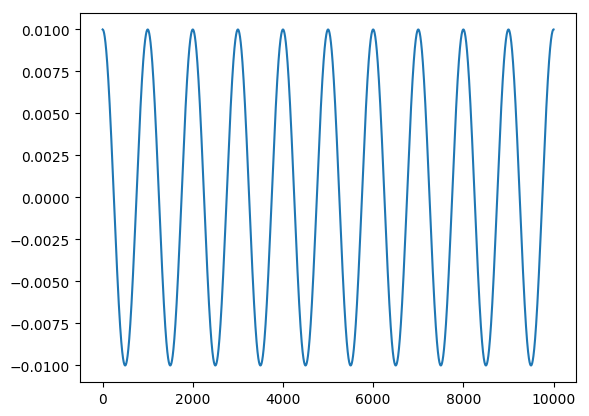

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000055DF60F0>

In [181]:
plot(S[1,:,1])

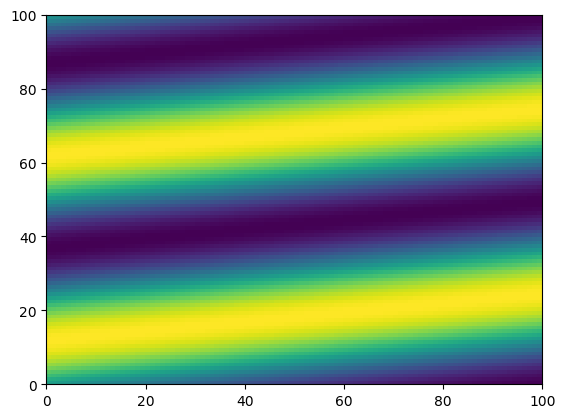

PyObject <matplotlib.collections.PolyCollection object at 0x000000005C7FDDA0>

In [163]:
pcolor(S[2,:,1:100:end])

In [172]:
ft=fft(S[1,:,:],2);

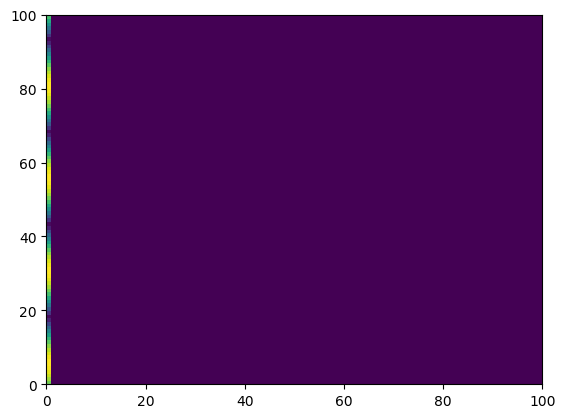

PyObject <matplotlib.collections.PolyCollection object at 0x000000006E67BB38>

In [177]:
pcolor(abs(ft[:,1:100:end]))

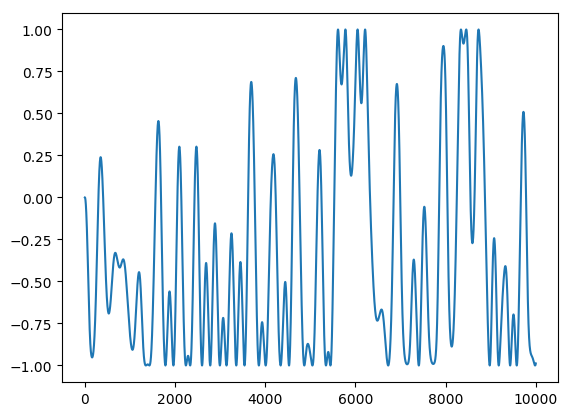

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000004FA2ADA0>

In [106]:
plot(S[3,1,1:end])
#plot(S[3,2,1:end])
#plot(S[3,3,1:end])

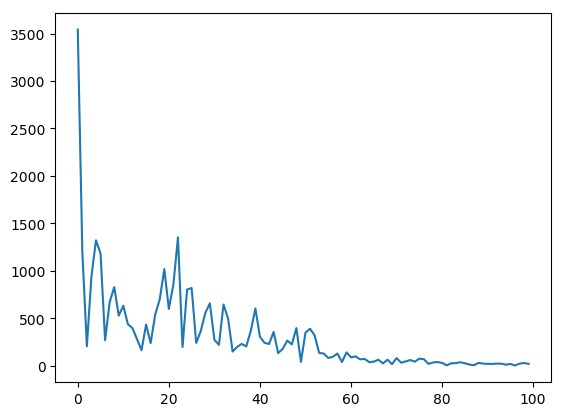

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000050044A58>

In [108]:
plot(abs(fft(S[3,1,:]))[1:100])